In [85]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [5]:
youtube_statistics_path = r'F:\DataSpell\Pandas training\data_sets\Global YouTube Statistics.csv'

In [35]:
youtube = pd.read_csv(youtube_statistics_path, encoding='ISO-8859-1').dropna(how='all')
youtube

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [34]:
youtube['video_views_rank'] = youtube['video_views_rank'].fillna(0).astype(int)
youtube['country_rank'] = youtube['country_rank'].fillna(0).astype(int)
youtube['channel_type_rank'] = youtube['channel_type_rank'].fillna(0).astype(int)
youtube['video_views_for_the_last_30_days'] = youtube['video_views_for_the_last_30_days'].fillna(0).astype(int)
youtube['lowest_monthly_earnings'] = youtube['lowest_monthly_earnings'].fillna(0).astype(int)
youtube['subscribers_for_last_30_days'] = youtube['subscribers_for_last_30_days'].fillna(0).astype(int)
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
youtube['created_month'] = youtube['created_month'].map(month_dict)
youtube['created_year'] = pd.to_datetime(youtube['created_year'])
youtube['created_date'] = pd.to_datetime(youtube['created_date'])
youtube['Population'] = youtube['Population'].fillna(0)
youtube['Unemployment rate'] = youtube['Unemployment rate'].fillna(0)
youtube['Urban_population'] = youtube['Urban_population'].fillna(0).astype(int)
youtube['Latitude'] = youtube['Latitude'].fillna('0')
youtube['Longitude'] = youtube['Longitude'].fillna('0')
youtube['category'] = youtube['category'].fillna('unknown')
youtube['Country'] = youtube['Country'].fillna(0)
youtube['Abbreviation'] = youtube['Abbreviation'].fillna('Unknown')

In [33]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     995 non-null    int64         
 1   Youtuber                                 995 non-null    object        
 2   subscribers                              995 non-null    int64         
 3   video views                              995 non-null    float64       
 4   category                                 995 non-null    object        
 5   Title                                    995 non-null    object        
 6   uploads                                  995 non-null    int64         
 7   Country                                  995 non-null    object        
 8   Abbreviation                             995 non-null    object        
 9   channel_type                             96

In [37]:
youtube

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [71]:
category = youtube.groupby('category')

category_subscribers = category['subscribers'].sum().sort_values(ascending=False).apply(lambda x: "{:,}".format(x))
category_video_views = category['video views'].sum().sort_values(ascending=False)
category_subscribers_sum_mean =  category['subscribers'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
category_uploads = category['uploads'].sum().sort_values(ascending=False)
category_uploads_mean_sum = category['uploads'].agg(['sum', 'mean']).sort_values(ascending=False, by='mean')

In [68]:
category_video_views
category_subscribers
category_subscribers_sum_mean
category_uploads
category_uploads_mean_sum

,sum,mean
category,,
News & Politics,2924594,112484.384615
Nonprofits & Activism,205824,102912.000000
Shows,356768,27443.692308
Sports,159431,14493.727273
Entertainment,2869944,11908.481328
People & Blogs,1213183,9190.780303
Trailers,13678,6839.000000
Pets & Animals,17806,4451.500000
Gaming,405461,4313.414894


# Load and Inspect the Dataset:

Load the CSV file into a pandas DataFrame.
Display the first 10 rows of the DataFrame to understand its structure.
Identify and print the number of missing values in each column.

In [203]:
youtube = pd.read_csv(youtube_statistics_path, encoding='latin1').dropna(how='all')
youtube.head(n=10)
youtube.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# Data Cleaning:

Handle missing values in the dataset in a way that makes sense for the analysis (e.g., fill with median, mean, or drop).
Find and remove any duplicate rows.

In [204]:
youtube['category'] = youtube['category'].replace({np.nan: 'Unknown'}).astype(str)
print(youtube['category'].unique())
youtube['Country'] = youtube['Country'].fillna('Unknown').astype(str)
youtube['Abbreviation'] = youtube['Abbreviation'].fillna('Unknown').astype(str)
youtube['channel_type'] = youtube['channel_type'].fillna('Unknown').astype(str)
youtube['video_views_rank'] = youtube['video_views_rank'].fillna(0).astype(int)
youtube['country_rank'] = youtube['country_rank'].fillna(0).astype(int)
youtube['channel_type_rank'] = youtube['channel_type_rank'].fillna(0).astype(int)
youtube['video_views_for_the_last_30_days'] = youtube['video_views_for_the_last_30_days'].fillna(0).astype(float)
youtube['subscribers_for_last_30_days'] = youtube['subscribers_for_last_30_days'].fillna(0).astype(int)
youtube['created_year'] = pd.to_datetime(youtube['created_year']).fillna(0)
youtube['created_date'] = youtube['created_date'].fillna(0).astype(int)
youtube['Gross tertiary education enrollment (%)'] = (youtube['Gross tertiary education enrollment (%)'].fillna(0)
                                                      .astype(float))
youtube['Population'] = youtube['Population'].fillna(0).astype(int)
youtube['Urban_population'] = youtube['Urban_population'].fillna(0).astype(int)
youtube['Latitude'] = youtube['Latitude'].fillna(0).astype(str)
youtube['Longitude'] = youtube['Longitude'].fillna(0).astype(str)
youtube['Unemployment rate'] = youtube['Unemployment rate'].fillna(0).astype(float)
youtube['created_month'] = youtube['created_month'].fillna('Unknown').astype(str)

['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' 'Unknown'
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


In [205]:
youtube

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000,1970-01-01 00:00:00.000002006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0,1970-01-01 00:00:00.000002006,Mar,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,1970-01-01 00:00:00.000002012,Feb,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,1970-01-01 00:00:00.000002006,Sep,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000,1970-01-01 00:00:00.000002006,Sep,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000,1970-01-01 00:00:00.000002017,Feb,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,1970-01-01 00:00:00.000002018,Sep,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
992,993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,...,1000,1970-01-01 00:00:00.000002006,Sep,11,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,1970-01-01 00:00:00.000002012,May,9,67.0,10285453,6.48,9021165,60.128161,18.643501


# Data Transformation:

Convert any timestamp columns to pandas datetime format.
If there are categorical columns, convert them into pandas category type.

In [206]:
# youtube['created_year'] = pd.to_datetime(youtube['created_year']).fillna(0)

# Exploratory Data Analysis (EDA):

Generate summary statistics for numerical columns.
Find the top 10 most viewed YouTube videos in the dataset.
Identify the distribution of videos' lengths, and plot a histogram.

In [207]:
summary_statistics = youtube.describe()
summary_statistics

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.950000e+02,995.000000,995.000000,9.950000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,9.950000e+02,995.000000,995.000000,9.950000e+02,995.000000,9.950000e+02
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.536919e+05,341.046231,720.986935,1.657267e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,2.308483e+05,15.667337,55.762211,3.771836e+08,8.132191,1.964980e+08
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362210e+06,1164.728018,1916.500613,4.065010e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,5.261092e+05,8.826000,32.191178,4.647169e+08,5.502432,1.625394e+08
min,1.00000,1.230000e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.175000e+02,5.000000,24.000000,1.351700e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,0.000000e+00,8.000000,28.100000,5.033944e+07,3.850000,4.082730e+07
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.130000e+02,34.000000,62.000000,5.635800e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,1.000000e+05,16.000000,60.000000,2.702039e+08,5.360000,1.832416e+08
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.579000e+03,114.000000,137.000000,1.585655e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,2.000000e+05,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08


In [208]:
most_viewed_youtube_videos = youtube.sort_values(by='video views', ascending=False).head(n=10)
most_viewed_youtube_videos = youtube.nlargest(10, 'video views')
most_viewed_youtube_videos

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000,1970-01-01 00:00:00.000002006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,1970-01-01 00:00:00.000002006,Sep,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000,1970-01-01 00:00:00.000002006,Sep,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000,1970-01-01 00:00:00.000002007,Aug,4,28.1,1366417754,5.36,471031528,20.593684,78.96288
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,0,1970-01-01 00:00:00.000002015,May,12,88.2,328239523,14.70,270663028,37.09024,-95.712891
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000,1970-01-01 00:00:00.000002016,Jan,14,81.9,144373535,4.59,107683889,61.52401,105.318756
11,12,WWE,96000000,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,600000,1970-01-01 00:00:00.000002007,May,11,88.2,328239523,14.70,270663028,37.09024,-95.712891
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000,1970-01-01 00:00:00.000002018,Apr,23,88.2,328239523,14.70,270663028,37.09024,-95.712891
21,22,Zee TV,70500000,7.313905e+10,Entertainment,Zee TV,129204,India,IN,Entertainment,...,900000,1970-01-01 00:00:00.000002005,Dec,11,28.1,1366417754,5.36,471031528,20.593684,78.96288
26,27,Colors TV,64600000,6.151091e+10,Shows,Colors TV,112915,India,IN,Entertainment,...,1100000,1970-01-01 00:00:00.000002008,Jun,13,28.1,1366417754,5.36,471031528,20.593684,78.96288


In [209]:
# Check if there's a column for video length
if 'video_length' in youtube.columns:
    # Plot a histogram of the video lengths
    plt.hist(youtube['video_length'], bins=50, color='blue', edgecolor='black')
    plt.title('Distribution of Video Lengths')
    plt.xlabel('Video Length')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The DataFrame doesn't have a column for video length.")

The DataFrame doesn't have a column for video length.


# Advanced Filtering:

Select all videos with more than 1 million views but less than 1 million likes.
Filter videos that have "music" in their title, case insensitive.

In [210]:
youtube.query("`video views` > 1000000")

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000,1970-01-01 00:00:00.000002006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,1970-01-01 00:00:00.000002012,Feb,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,1970-01-01 00:00:00.000002006,Sep,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000,1970-01-01 00:00:00.000002006,Sep,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,0,1970-01-01 00:00:00.000002015,May,12,88.2,328239523,14.70,270663028,37.09024,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000,1970-01-01 00:00:00.000002017,Feb,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,1970-01-01 00:00:00.000002018,Sep,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
992,993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,...,1000,1970-01-01 00:00:00.000002006,Sep,11,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,1970-01-01 00:00:00.000002012,May,9,67.0,10285453,6.48,9021165,60.128161,18.643501


In [211]:
youtube[youtube['Title'].str.contains('music')]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
122,123,Desi Music Factory,33700000,1.018903e+10,Music,Desi music factory,2,Unknown,Unknown,Music,...,0,1970-01-01 00:00:00.000002018,Apr,10,0.0,0,0.0,0,0.0,0.0


# Grouping and Aggregation:

Group the dataset by category and calculate the average number of views for each category.
Find the category with the highest average likes.

In [212]:
category = youtube.groupby('category')
category_views = category['video views'].mean()
category_avg_likes_top_1 = category['video views'].mean().sort_values(ascending=False)
category_avg_likes_top_1

category
Shows                    3.432360e+10
Trailers                 1.663136e+10
Education                1.548032e+10
Music                    1.545286e+10
Sports                   1.345330e+10
Film & Animation         1.183527e+10
Pets & Animals           1.121669e+10
Entertainment            1.048854e+10
News & Politics          1.039969e+10
People & Blogs           9.589327e+09
Comedy                   7.972649e+09
Movies                   7.691628e+09
Gaming                   7.634456e+09
Autos & Vehicles         7.501729e+09
Unknown                  6.622682e+09
Nonprofits & Activism    5.431456e+09
Howto & Style            5.045439e+09
Science & Technology     3.939809e+09
Travel & Events          3.140883e+09
Name: video views, dtype: float64

# New solutions

# 1. Load the Dataset: Load the dataset into a Pandas DataFrame and display the first 10 rows.

In [213]:
youtube = pd.read_csv(youtube_statistics_path, encoding='latin1')
youtube.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


# 2. Data Cleaning:
Identify and handle missing values.
Find and remove any duplicate rows.
Standardize the format of column names (e.g., lowercase with underscores).

In [214]:
youtube['category'] = youtube['category'].replace({np.nan: 'Unknown'}).astype(str)
print(youtube['category'].unique())
youtube['Country'] = youtube['Country'].fillna('Unknown').astype(str)
youtube['Abbreviation'] = youtube['Abbreviation'].fillna('Unknown').astype(str)
youtube['channel_type'] = youtube['channel_type'].fillna('Unknown').astype(str)
youtube['video_views_rank'] = youtube['video_views_rank'].fillna(0).astype(int)
youtube['country_rank'] = youtube['country_rank'].fillna(0).astype(int)
youtube['channel_type_rank'] = youtube['channel_type_rank'].fillna(0).astype(int)
youtube['video_views_for_the_last_30_days'] = youtube['video_views_for_the_last_30_days'].fillna(0).astype(float)
youtube['subscribers_for_last_30_days'] = youtube['subscribers_for_last_30_days'].fillna(0).astype(int)
youtube['created_year'] = pd.to_datetime(youtube['created_year']).fillna(0)
youtube['created_date'] = youtube['created_date'].fillna(0).astype(int)
youtube['Gross tertiary education enrollment (%)'] = (youtube['Gross tertiary education enrollment (%)'].fillna(0)
                                                      .astype(float))
youtube['Population'] = youtube['Population'].fillna(0).astype(int)
youtube['Urban_population'] = youtube['Urban_population'].fillna(0).astype(int)
youtube['Latitude'] = youtube['Latitude'].fillna(0).astype(str)
youtube['Longitude'] = youtube['Longitude'].fillna(0).astype(str)
youtube['Unemployment rate'] = youtube['Unemployment rate'].fillna(0).astype(float)
youtube['created_month'] = youtube['created_month'].fillna('Unknown').astype(str)

['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' 'Unknown'
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


In [215]:
duplicates = youtube.duplicated()
duplicates.sum()
youtube = youtube[~duplicates]
print("Number of rows after removing duplicates:", len(youtube))

Number of rows after removing duplicates: 995


In [216]:
youtube.columns = youtube.columns.str.title()

# 3. Data Type Conversion: 
Convert appropriate columns to categorical, datetime, or numerical types, as relevant.

In [217]:
youtube = youtube.set_index('Rank')
youtube.nunique()

Youtuber                                   995
Subscribers                                289
Video Views                                988
Category                                    19
Title                                      992
Uploads                                    777
Country                                     50
Abbreviation                                50
Channel_Type                                15
Video_Views_Rank                           954
Country_Rank                               247
Channel_Type_Rank                          287
Video_Views_For_The_Last_30_Days           909
Lowest_Monthly_Earnings                    557
Highest_Monthly_Earnings                   736
Lowest_Yearly_Earnings                     757
Highest_Yearly_Earnings                    419
Subscribers_For_Last_30_Days                54
Created_Year                                20
Created_Month                               13
Created_Date                                32
Gross Tertiar

In [218]:
youtube.dtypes

Youtuber                                    object
Subscribers                                  int64
Video Views                                float64
Category                                    object
Title                                       object
Uploads                                      int64
Country                                     object
Abbreviation                                object
Channel_Type                                object
Video_Views_Rank                             int32
Country_Rank                                 int32
Channel_Type_Rank                            int32
Video_Views_For_The_Last_30_Days           float64
Lowest_Monthly_Earnings                    float64
Highest_Monthly_Earnings                   float64
Lowest_Yearly_Earnings                     float64
Highest_Yearly_Earnings                    float64
Subscribers_For_Last_30_Days                 int32
Created_Year                                object
Created_Month                  

In [219]:
# youtube.drop('index', axis=1, inplace=True)
youtube

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,Mar,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48,...,8000000,1970-01-01 00:00:00.000002012,Feb,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,Sep,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,Sep,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525,...,700000,1970-01-01 00:00:00.000002017,Feb,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,...,300000,1970-01-01 00:00:00.000002018,Sep,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,...,1000,1970-01-01 00:00:00.000002006,Sep,11,60.0,66834405,3.85,55908316,55.378051,-3.435973


In [220]:
youtube['Created_Year'] = pd.to_datetime(youtube['Created_Year'])
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
youtube['Created_Month'] = youtube['Created_Month'].map(month_dict)

In [222]:
youtube.dtypes

Youtuber                                           object
Subscribers                                         int64
Video Views                                       float64
Category                                           object
Title                                              object
Uploads                                             int64
Country                                            object
Abbreviation                                       object
Channel_Type                                       object
Video_Views_Rank                                    int32
Country_Rank                                        int32
Channel_Type_Rank                                   int32
Video_Views_For_The_Last_30_Days                  float64
Lowest_Monthly_Earnings                           float64
Highest_Monthly_Earnings                          float64
Lowest_Yearly_Earnings                            float64
Highest_Yearly_Earnings                           float64
Subscribers_Fo

# 4. Descriptive Statistics: Compute and interpret descriptive statistics for numerical and categorical columns.

In [225]:
numerical_stats = youtube.describe()
numerical_stats

categorical_stats = youtube.describe(include=['object'])
categorical_stats

,Youtuber,Category,Title,Country,Abbreviation,Channel_Type,Latitude,Longitude
count,995,995,995,995,995,995,995,995
unique,995,19,992,50,50,15,49,49
top,T-Series,Entertainment,Preston,United States,US,Entertainment,37.09024,-95.712891
freq,1,241,2,313,313,304,313,313


# 5. Data Filtering:
Filter the dataset to include only videos with more than 1 million views.
Extract rows corresponding to a specific category (e.g., "Music" or "Education").

In [226]:
youtube

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,3.0,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48,...,8000000,1970-01-01 00:00:00.000002012,2.0,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,9.0,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,9.0,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525,...,700000,1970-01-01 00:00:00.000002017,2.0,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,...,300000,1970-01-01 00:00:00.000002018,9.0,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,...,1000,1970-01-01 00:00:00.000002006,9.0,11,60.0,66834405,3.85,55908316,55.378051,-3.435973


In [236]:
video_more_1_mln = youtube.query("`Video Views` > 1_000_000")
video_more_1_mln
music_videos = youtube.query("Category == 'Music'")
education_videos = youtube[youtube['Category'] == 'Education']
education_videos
music_videos

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,12,...,1100000,1970-01-01 00:00:00.000002014,3.0,12,28.1,1366417754,5.36,471031528,20.593684,78.96288
18,BANGTANTV,75600000,2.082699e+10,Music,BANGTANTV,2281,South Korea,KR,Music,112,...,400000,1970-01-01 00:00:00.000002012,12.0,17,94.3,51709098,4.15,42106719,35.907757,127.766922
20,Justin Bieber,71600000,3.060812e+10,Music,Justin Bieber,249,Canada,CA,Music,38,...,100000,1970-01-01 00:00:00.000002007,1.0,15,68.9,36991981,5.56,30628482,56.130366,-106.346771
21,HYBE LABELS,71300000,2.863457e+10,Music,HYBE LABELS,1337,South Korea,KR,Music,46,...,900000,1970-01-01 00:00:00.000002008,6.0,4,94.3,51709098,4.15,42106719,35.907757,127.766922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Mundo Bita,12500000,1.669079e+10,Music,Mundo Bita,253,Brazil,BR,Music,171,...,100000,1970-01-01 00:00:00.000002011,9.0,29,51.3,212559417,12.08,183241641,-14.235004,-51.92528
967,Wave Music Bhakti,12500000,5.146004e+09,Music,Wave Music Bhakti,19899,India,IN,Music,1299,...,0,1970-01-01 00:00:00.000002011,4.0,19,28.1,1366417754,5.36,471031528,20.593684,78.96288
983,DisneyChannelUK,12400000,1.260749e+10,Music,DisneyChannelUK,4422,United Kingdom,GB,Entertainment,306,...,0,1970-01-01 00:00:00.000002007,12.0,6,60.0,66834405,3.85,55908316,55.378051,-3.435973


# 7. GroupBy Operations:
Group the data by category and compute the average number of views and likes.
Find the maximum and minimum number of views for each category.

In [239]:
youtube_category_views = youtube.groupby('Category')['Video Views'].mean()
youtube_category_views_min_max = youtube.groupby('Category')['Video Views'].agg(
  ['min', 'max']
)
youtube_category_views_min_max

,min,max
Category,,
Autos & Vehicles,5.405563e+09,9.597895e+09
Comedy,1.001465e+09,3.430048e+10
Education,1.349289e+09,1.640000e+11
Entertainment,1.066458e+07,7.718017e+10
Film & Animation,0.000000e+00,5.931647e+10
Gaming,3.517633e+08,2.905804e+10
Howto & Style,1.002220e+09,2.623679e+10
Movies,5.320485e+09,1.006277e+10
Music,5.597655e+08,2.280000e+11


# 8. Sorting and Ranking:
Sort the dataset based on the number of views in descending order.
Rank videos based on their like to view ratio within each category.

In [242]:
sort_views = youtube.sort_values(by='Video Views', ascending=False)
sort_views

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,9.0,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,9.0,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,4,...,1100000,1970-01-01 00:00:00.000002007,8.0,4,28.1,1366417754,5.36,471031528,20.593684,78.96288
7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5,...,0,1970-01-01 00:00:00.000002015,5.0,12,88.2,328239523,14.70,270663028,37.09024,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Popular on YouTube,29300000,0.000000e+00,Unknown,Popular on Youtube,3,Unknown,Unknown,Education,4019724,...,0,1970-01-01 00:00:00.000002017,8.0,7,0.0,0,0.00,0,0.0,0.0
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,3.0,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
103,News,36300000,0.000000e+00,Unknown,News,0,Unknown,Unknown,Unknown,4057944,...,0,1970-01-01 00:00:00.000002013,9.0,9,0.0,0,0.00,0,0.0,0.0


# 9. Date and Time Analysis:
If there's a publication date, analyze video publication trends over time.
Identify the day of the week when most videos are published.

In [243]:
# Check if there's a column for publication date
if 'publication_date' in youtube.columns:
    # Convert the 'publication_date' column to datetime format
    youtube['publication_date'] = pd.to_datetime(youtube['publication_date'])

    # Set 'publication_date' as the DataFrame's index
    youtube.set_index('publication_date', inplace=True)

    # Resample the DataFrame by month and count the number of videos
    monthly_videos = youtube.resample('M').size()

    # Plot the number of videos published over time
    monthly_videos.plot(kind='line', figsize=(10, 6))
    plt.title('Video Publication Trends Over Time')
    plt.xlabel('Publication Date')
    plt.ylabel('Number of Videos')
    plt.show()
else:
    print("The DataFrame doesn't have a column for publication date.")

The DataFrame doesn't have a column for publication date.


In [244]:
# Check if there's a column for publication date
if 'publication_date' in youtube.columns:
    # Convert the 'publication_date' column to datetime format
    youtube['publication_date'] = pd.to_datetime(youtube['publication_date'])

    # Extract the day of the week from the publication date
    youtube['day_of_week'] = youtube['publication_date'].dt.dayofweek

    # Count the number of videos published on each day of the week
    videos_per_day = youtube['day_of_week'].value_counts().sort_index()

    # Identify the day with the highest count
    most_videos_day = videos_per_day.idxmax()

    # Print the day of the week when most videos are published
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    print(f"The day of the week when most videos are published is: {days[most_videos_day]}")
else:
    print("The DataFrame doesn't have a column for publication date.")

The DataFrame doesn't have a column for publication date.


# 10. Text Data Manipulation:
Extract hashtags from video titles and create a separate column for them.
Count the occurrence of specific words in video titles.

In [245]:
youtube

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,3.0,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48,...,8000000,1970-01-01 00:00:00.000002012,2.0,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,9.0,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,9.0,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525,...,700000,1970-01-01 00:00:00.000002017,2.0,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,...,300000,1970-01-01 00:00:00.000002018,9.0,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,...,1000,1970-01-01 00:00:00.000002006,9.0,11,60.0,66834405,3.85,55908316,55.378051,-3.435973


In [247]:
youtube_hast_tag = youtube['Title'].str.findall(r'#(\w+)')
youtube_hast_tag

Rank
1      []
2      []
3      []
4      []
5      []
       ..
991    []
992    []
993    []
994    []
995    []
Name: Title, Length: 995, dtype: object

In [253]:
title_words = youtube['Title'].str.lower().str.split()
title_words = pd.Series([word for word_list in title_words for word in word_list])
word_count = title_words.value_counts(ascending=False)
word_count

-               39
kids            27
and             23
tv              21
music           20
                ..
speaker          1
motivational     1
bindra:          1
vivek            1
joke             1
Name: count, Length: 1466, dtype: int64

# 10. Advanced Filtering:
Use boolean indexing to filter videos that have both high views and high like to dislike ratios.
Implement query method to select videos based on multiple criteria.

In [255]:
# Define high views and high like to dislike ratio
high_views = 1_000_000
high_ratio = 10

# Create boolean masks
high_views_mask = youtube['Video Views'] > high_views
high_ratio_mask = youtube['likes'] / (youtube['dislikes'] + 1) > high_ratio  # Adding 1 to avoid division by zero

# Use boolean masks to filter DataFrame
filtered_youtube = youtube[high_views_mask & high_ratio_mask]
filtered_youtube

KeyError: 'likes'

In [264]:
filtered_videos = youtube.query("`Video Views` > 19_000_000_000 & Category == 'Music'")
filtered_videos

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,12,...,1100000,1970-01-01 00:00:00.000002014,3.0,12,28.1,1366417754,5.36,471031528,20.593684,78.96288
18,BANGTANTV,75600000,2.082699e+10,Music,BANGTANTV,2281,South Korea,KR,Music,112,...,400000,1970-01-01 00:00:00.000002012,12.0,17,94.3,51709098,4.15,42106719,35.907757,127.766922
20,Justin Bieber,71600000,3.060812e+10,Music,Justin Bieber,249,Canada,CA,Music,38,...,100000,1970-01-01 00:00:00.000002007,1.0,15,68.9,36991981,5.56,30628482,56.130366,-106.346771
21,HYBE LABELS,71300000,2.863457e+10,Music,HYBE LABELS,1337,South Korea,KR,Music,46,...,900000,1970-01-01 00:00:00.000002008,6.0,4,94.3,51709098,4.15,42106719,35.907757,127.766922
24,Canal KondZilla,66500000,3.677559e+10,Music,Canal KondZilla,2572,Brazil,BR,Music,25,...,0,1970-01-01 00:00:00.000002012,3.0,21,51.3,212559417,12.08,183241641,-14.235004,-51.92528
26,Shemaroo Filmi Gaane,65600000,2.864802e+10,Music,Shemaroo Filmi Gaane,8502,India,IN,Music,47,...,400000,1970-01-01 00:00:00.000002010,6.0,11,28.1,1366417754,5.36,471031528,20.593684,78.96288
28,T-Series Bhakti Sagar,61000000,2.953323e+10,Music,T- SERIES BHAKTI SAGAR,13,India,IN,Music,4053938,...,0,1970-01-01 00:00:00.000002018,8.0,3,28.1,1366417754,5.36,471031528,20.593684,78.96288
31,Tips Official,59300000,3.343180e+10,Music,Tips Official,4741,India,IN,Music,30,...,600000,1970-01-01 00:00:00.000002007,5.0,22,28.1,1366417754,5.36,471031528,20.593684,78.96288


# 12. Pivot Tables and Cross-Tabulation:
Create a pivot table showing the average number of comments by category and by month (if date information is available).
Use cross-tabulation to explore the relationship between two categorical variables.

In [277]:
pivot_table = (youtube.pivot_table(
  index='Country',
  columns='Category', 
  values='Uploads', 
  aggfunc='sum', 
  margins=True, 
  margins_name='Total')
               .sort_values(by='Total', ascending=False))
pivot_table

Category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events,Unknown,Total
Country,,,,,,,,,,,,,,,,,,,,
Total,3797.0,77263.0,141429.0,2869944.0,128784.0,405461.0,66934.0,7106.0,471773.0,2924594.0,205824.0,1213183.0,17806.0,35939.0,356768.0,159431.0,13678.0,766.0,40710.0,9141190
India,NaN,6410.0,104499.0,1121614.0,40659.0,4483.0,6996.0,7106.0,187553.0,1221836.0,NaN,674326.0,NaN,10632.0,326315.0,NaN,13678.0,NaN,2105.0,3728212
United States,NaN,37631.0,24344.0,127237.0,57387.0,238758.0,26795.0,NaN,47274.0,252146.0,200933.0,103056.0,1751.0,12030.0,25086.0,133516.0,NaN,NaN,11665.0,1299609
Thailand,NaN,1623.0,NaN,582639.0,NaN,3151.0,NaN,NaN,26641.0,244899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858953
Philippines,NaN,NaN,NaN,125743.0,NaN,NaN,NaN,NaN,1823.0,515814.0,NaN,194710.0,NaN,NaN,NaN,NaN,NaN,NaN,453.0,838543
Indonesia,NaN,NaN,7022.0,315898.0,NaN,4032.0,NaN,NaN,65286.0,269050.0,NaN,15709.0,NaN,NaN,NaN,NaN,NaN,NaN,1324.0,678321
Pakistan,NaN,NaN,NaN,317609.0,NaN,NaN,NaN,NaN,NaN,190093.0,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,22.0,507947
Ukraine,NaN,NaN,NaN,4866.0,NaN,NaN,2387.0,NaN,NaN,211620.0,NaN,NaN,NaN,NaN,1255.0,NaN,NaN,NaN,NaN,220128
United Arab Emirates,855.0,693.0,NaN,NaN,NaN,379.0,NaN,NaN,NaN,NaN,NaN,170900.0,NaN,NaN,NaN,NaN,NaN,NaN,15595.0,188422


In [282]:
cross_tab = pd.crosstab(youtube['Category'], youtube['Country'])
cross_tab[['India', 'United States']]

Country,India,United States
Category,,
Autos & Vehicles,0,0
Comedy,16,22
Education,15,17
Entertainment,45,68
Film & Animation,11,12
Gaming,2,26
Howto & Style,6,12
Movies,2,0
Music,29,73


# 13. Data Aggregation:
Aggregate data to create summary statistics for each category over different time periods.
Compute rolling averages of views.

In [284]:
youtube

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,3.0,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48,...,8000000,1970-01-01 00:00:00.000002012,2.0,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,9.0,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,9.0,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525,...,700000,1970-01-01 00:00:00.000002017,2.0,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,...,300000,1970-01-01 00:00:00.000002018,9.0,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,...,1000,1970-01-01 00:00:00.000002006,9.0,11,60.0,66834405,3.85,55908316,55.378051,-3.435973


In [293]:
# grouped = youtube.groupby(['Category', youtube['Created_Year'].dt.year]).count()
grouped = youtube.groupby(['Category', youtube['Created_Month']]).count().sort_index()
grouped

Youtuber  Subscribers  Video Views  Title  \
Category         Created_Month                                              
Autos & Vehicles 3.0                   1            1            1      1   
                 9.0                   1            1            1      1   
Comedy           1.0                  11           11           11     11   
                 2.0                   7            7            7      7   
                 3.0                   9            9            9      9   
...                                  ...          ...          ...    ...   
Unknown          8.0                   2            2            2      2   
                 9.0                   5            5            5      5   
                 10.0                  4            4            4      4   
                 11.0                 10           10           10     10   
                 12.0                  7            7            7      7   

                                Uploads  Country  Abbreviation  Channel_Type  \
Category         Created_Month                                                 
Autos & Vehicles 3.0                  1        1             1             1   
                 9.0                  1        1             1             1   
Comedy           1.0                 11       11            11            11   
                 2.0                  7        7             7             7   
                 3.0                  9        9             9             9   
...                                 ...      ...           ...           ...   
Unknown          8.0                  2        2             2             2   
                 9.0                  5        5             5             5   
                 10.0                 4        4             4             4   
                 11.0                10       10            10            10   
                 12.0                 7        7             7             7   

                                Video_Views_Rank  Country_Rank  ...  \
Category         Created_Month                                  ...   
Autos & Vehicles 3.0                           1             1  ...   
                 9.0                           1             1  ...   
Comedy           1.0                          11            11  ...   
                 2.0                           7             7  ...   
                 3.0                           9             9  ...   
...                                          ...           ...  ...   
Unknown          8.0                           2             2  ...   
                 9.0                           5             5  ...   
                 10.0                          4             4  ...   
                 11.0                         10            10  ...   
                 12.0                          7             7  ...   

                                Highest_Yearly_Earnings  \
Category         Created_Month                            
Autos & Vehicles 3.0                                  1   
                 9.0                                  1   
Comedy           1.0                                 11   
                 2.0                                  7   
                 3.0                                  9   
...                                                 ...   
Unknown          8.0                                  2   
                 9.0                                  5   
                 10.0                                 4   
                 11.0                                10   
                 12.0                                 7   

                                Subscribers_For_Last_30_Days  Created_Year  \
Category         Created_Month                                               
Autos & Vehicles 3.0                                       1             1   
                 9.0                                       1   

In [296]:
summary_statistics = grouped['Video Views'].describe()
summary_statistics

count    152.000000
mean       6.513158
std        6.319304
min        1.000000
25%        2.000000
50%        4.000000
75%        9.250000
max       27.000000
Name: Video Views, dtype: float64

In [301]:
# Compute 7-day rolling average of views
youtube_rolling_avg_views = youtube['Video Views'].rolling(window=7).mean()
youtube_rolling_avg_views

Rank
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
           ...     
991    6.667297e+09
992    6.575752e+09
993    6.407561e+09
994    4.466780e+09
995    3.885021e+09
Name: Video Views, Length: 995, dtype: float64

In [303]:
# Compute 7-day rolling average of views, requiring at least 1 non-NA value
youtube_rolling_avg_views = youtube['Video Views'].rolling(window=7, min_periods=1).mean()
youtube_rolling_avg_views

Rank
1      2.280000e+11
2      1.140000e+11
3      8.545628e+10
4      1.050922e+11
5      1.136738e+11
           ...     
991    6.667297e+09
992    6.575752e+09
993    6.407561e+09
994    4.466780e+09
995    3.885021e+09
Name: Video Views, Length: 995, dtype: float64

# 14. Visualization:
Generate histograms to visualize the distribution of views and likes.
Create scatter plots to explore the relationship between views and likes.

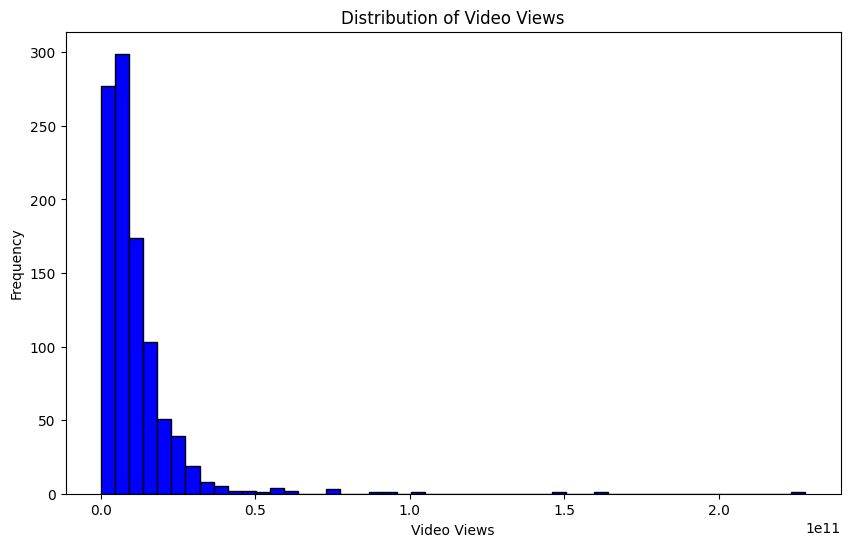

KeyError: 'likes'

<Figure size 1000x600 with 0 Axes>

In [307]:
# Create a histogram for the 'video views' column
plt.figure(figsize=(10, 6))
plt.hist(youtube['Video Views'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Video Views')
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for the 'likes' column
plt.figure(figsize=(10, 6))
plt.hist(youtube['likes'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

In [309]:
# Create a scatter plot for the 'Video Views' and 'likes' columns
plt.figure(figsize=(10, 6))
plt.scatter(youtube['Video Views'], youtube['likes'], alpha=0.5)
plt.title('Relationship between Video Views and Likes')
plt.xlabel('Video Views')
plt.ylabel('Likes')
plt.show()

KeyError: 'likes'

<Figure size 1000x600 with 0 Axes>

# 15. Correlation Analysis:
Compute and interpret correlation coefficients between numerical variables.
Visualize correlation matrices using heatmaps.

In [312]:
# Select only numerical columns
numerical_columns = youtube.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
correlation_matrix

,Subscribers,Video Views,Uploads,Video_Views_Rank,Country_Rank,Channel_Type_Rank,Video_Views_For_The_Last_30_Days,Lowest_Monthly_Earnings,Highest_Monthly_Earnings,Lowest_Yearly_Earnings,Highest_Yearly_Earnings,Subscribers_For_Last_30_Days,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population
Subscribers,1.000000,0.750958,0.077136,0.057388,0.029136,0.025103,0.268556,0.388941,0.388579,0.389072,0.388935,0.273450,-0.031266,-0.009186,-0.017457,0.068771,-0.017234,0.062183
Video Views,0.750958,1.000000,0.165928,-0.061541,-0.062024,-0.046935,0.364076,0.552096,0.551455,0.552776,0.552091,0.210308,-0.012682,-0.035441,0.012651,0.086223,0.019882,0.083770
Uploads,0.077136,0.165928,1.000000,-0.108865,-0.067727,-0.094620,0.107344,0.166922,0.167283,0.167745,0.166904,0.051745,0.033512,0.037028,-0.103049,0.164715,-0.102821,0.107820
Video_Views_Rank,0.057388,-0.061541,-0.108865,1.000000,0.535202,0.812766,-0.113343,-0.208608,-0.208680,-0.208694,-0.208596,-0.175407,0.011454,0.014687,-0.331857,-0.232549,-0.320032,-0.321648
Country_Rank,0.029136,-0.062024,-0.067727,0.535202,1.000000,0.537084,-0.103833,-0.131474,-0.131506,-0.131529,-0.131467,-0.112267,-0.025014,-0.042094,0.142895,-0.019524,0.110307,0.023814
Channel_Type_Rank,0.025103,-0.046935,-0.094620,0.812766,0.537084,1.000000,-0.141811,-0.179970,-0.180029,-0.180051,-0.179959,-0.154111,0.017833,0.032933,-0.232050,-0.198886,-0.222569,-0.258644
Video_Views_For_The_Last_30_Days,0.268556,0.364076,0.107344,-0.113343,-0.103833,-0.141811,1.000000,0.684094,0.684054,0.684044,0.684094,0.491186,-0.006325,-0.008827,0.023417,0.077616,0.041868,0.083157
Lowest_Monthly_Earnings,0.388941,0.552096,0.166922,-0.208608,-0.131474,-0.179970,0.684094,1.000000,0.999955,0.999942,0.999998,0.705702,0.011097,-0.035314,0.011990,0.121486,0.014626,0.108418
Highest_Monthly_Earnings,0.388579,0.551455,0.167283,-0.208680,-0.131506,-0.180029,0.684054,0.999955,1.000000,0.999884,0.999953,0.706032,0.011242,-0.035004,0.012060,0.121430,0.014748,0.108383
Lowest_Yearly_Earnings,0.389072,0.552776,0.167745,-0.208694,-0.131529,-0.180051,0.684044,0.999942,0.999884,1.000000,0.999941,0.704823,0.011585,-0.035092,0.011853,0.121444,0.014598,0.108358


# 16. Handling Outliers:
Identify outliers in the views and likes columns.
Apply methods to handle these outliers, such as trimming or transformation.

In [325]:
# Calculate Q1, Q3, and IQR for 'views' column
Q1_views = youtube['Video Views'].quantile(0.25)
Q3_views = youtube['Video Views'].quantile(0.75)
IQR_views = Q3_views - Q1_views

# Define bounds for 'views' outliers
lower_bound_views = Q1_views - 1.5 * IQR_views
upper_bound_views = Q3_views + 1.5 * IQR_views

# Identify 'views' outliers
outliers_views = youtube[(youtube['Video Views'] < lower_bound_views) | (youtube['Video Views'] > upper_bound_views)]

# Calculate Q1, Q3, and IQR for 'likes' column
Q1_likes = youtube['Subscribers'].quantile(0.25)
Q3_likes = youtube['Subscribers'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes

# Define bounds for 'likes' outliers
lower_bound_likes = Q1_likes - 1.5 * IQR_likes
upper_bound_likes = Q3_likes + 1.5 * IQR_likes

# Identify 'likes' outliers
outliers_likes = youtube[(youtube['Subscribers'] < lower_bound_likes) | (youtube['Subscribers'] > upper_bound_likes)]

print("Outliers in 'Video Views' column:")
print(outliers_views)

print("\nOutliers in 'likes' column:")
outliers_likes

Outliers in 'Video Views' column:
                                               Youtuber  Subscribers  \
Rank                                                                   
1                                              T-Series    245000000   
3                                               MrBeast    166000000   
4                            Cocomelon - Nursery Rhymes    162000000   
5                                             SET India    159000000   
7                                   ýýý Kids Diana Show    112000000   
8                                             PewDiePie    111000000   
9                                           Like Nastya    106000000   
10                                        Vlad and Niki     98900000   
11                                    Zee Music Company     96700000   
12                                                  WWE     96000000   
14                                            BLACKPINK     89800000   
16                            

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,3.0,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48,...,8000000,1970-01-01 00:00:00.000002012,2.0,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,9.0,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,9.0,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Kimberly Loaiza,41300000,5.603112e+09,People & Blogs,Kimberly Loaiza,291,Mexico,MX,People,1157,...,400000,1970-01-01 00:00:00.000002016,11.0,16,40.2,126014024,3.42,102626859,23.634501,-102.552784
73,Little Baby Bum - Nursery Rhymes & Kids Songs,40900000,3.945082e+10,Education,Little Baby Bum - Nursery Rhymes & Kids Songs,2423,United States,US,Education,22,...,100000,1970-01-01 00:00:00.000002011,6.0,22,88.2,328239523,14.70,270663028,37.09024,-95.712891
74,Luisito Comunica,40600000,8.670474e+09,Comedy,Luis Arturo Villar Sudek,0,Mexico,MX,Comedy,3612215,...,0,1970-01-01 00:00:00.000002010,6.0,18,40.2,126014024,3.42,102626859,23.634501,-102.552784


In [324]:
# Trimming
trimmed_youtube = youtube[(youtube['Video Views'] >= lower_bound_views) & (youtube['Video Views'] <= upper_bound_views) & (youtube['Subscribers'] >= lower_bound_likes) & (youtube['Subscribers'] <= upper_bound_likes)]

# Transformation (using log transformation)
transformed_youtube = youtube.copy()
transformed_youtube['Video Views'] = np.log1p(youtube['Video Views'])
transformed_youtube['Subscribers'] = np.log1p(youtube['Subscribers'])

In [326]:
youtube

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,Video_Views_Rank,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
Rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1,...,2000000,1970-01-01 00:00:00.000002006,3.0,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159,...,0,1970-01-01 00:00:00.000002006,3.0,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48,...,8000000,1970-01-01 00:00:00.000002012,2.0,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,...,1000000,1970-01-01 00:00:00.000002006,9.0,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3,...,1000000,1970-01-01 00:00:00.000002006,9.0,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525,...,700000,1970-01-01 00:00:00.000002017,2.0,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,...,300000,1970-01-01 00:00:00.000002018,9.0,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,...,1000,1970-01-01 00:00:00.000002006,9.0,11,60.0,66834405,3.85,55908316,55.378051,-3.435973


# 18. Data Transformation:
Apply log transformation to skewed data to normalize its distribution.
Normalize or standardize numerical columns.

In [330]:
# Identify skewed numerical columns
numerical_cols = youtube.select_dtypes(include=[np.number]).columns
skewed_cols = youtube[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

# Apply log transformation to skewed numerical columns
for col in skewed_cols.index:
    if skewed_cols[col] > 0.5:
        youtube[col] = np.log1p(youtube[col])

skewed_cols

Subscribers                                1.511302
Urban_Population                           0.445455
Country_Rank                               0.292847
Video_Views_Rank                           0.109944
Unemployment Rate                          0.018540
Created_Date                              -0.019537
Created_Month                             -0.046280
Gross Tertiary Education Enrollment (%)   -0.335152
Subscribers_For_Last_30_Days              -0.412774
Uploads                                   -0.517390
Lowest_Monthly_Earnings                   -1.329691
Channel_Type_Rank                         -1.384880
Lowest_Yearly_Earnings                    -1.492392
Highest_Monthly_Earnings                  -1.507956
Highest_Yearly_Earnings                   -1.622772
Video_Views_For_The_Last_30_Days          -1.918783
Population                                -2.136563
Video Views                               -7.862781
dtype: float64

In [333]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical columns
numerical_cols = youtube.select_dtypes(include=[np.number]).columns

# Apply standardization on numerical columns
youtube[numerical_cols] = scaler.fit_transform(youtube[numerical_cols])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization on numerical columns
youtube[numerical_cols] = scaler.fit_transform(youtube[numerical_cols])

# 19. Multi-Index Operations:
Create a multi-index DataFrame based on category and another suitable column.
Perform slicing on the multi-index DataFrame.

In [338]:
youtube = pd.read_csv(youtube_statistics_path, encoding='latin1')
youtube.head(10)

youtube['category'] = youtube['category'].replace({np.nan: 'Unknown'}).astype(str)
print(youtube['category'].unique())
youtube['Country'] = youtube['Country'].fillna('Unknown').astype(str)
youtube['Abbreviation'] = youtube['Abbreviation'].fillna('Unknown').astype(str)
youtube['channel_type'] = youtube['channel_type'].fillna('Unknown').astype(str)
youtube['video_views_rank'] = youtube['video_views_rank'].fillna(0).astype(int)
youtube['country_rank'] = youtube['country_rank'].fillna(0).astype(int)
youtube['channel_type_rank'] = youtube['channel_type_rank'].fillna(0).astype(int)
youtube['video_views_for_the_last_30_days'] = youtube['video_views_for_the_last_30_days'].fillna(0).astype(float)
youtube['subscribers_for_last_30_days'] = youtube['subscribers_for_last_30_days'].fillna(0).astype(int)
youtube['created_year'] = pd.to_datetime(youtube['created_year']).fillna(0)
youtube['created_date'] = youtube['created_date'].fillna(0).astype(int)
youtube['Gross tertiary education enrollment (%)'] = (youtube['Gross tertiary education enrollment (%)'].fillna(0)
                                                      .astype(float))
youtube['Population'] = youtube['Population'].fillna(0).astype(int)
youtube['Urban_population'] = youtube['Urban_population'].fillna(0).astype(int)
youtube['Latitude'] = youtube['Latitude'].fillna(0).astype(str)
youtube['Longitude'] = youtube['Longitude'].fillna(0).astype(str)
youtube['Unemployment rate'] = youtube['Unemployment rate'].fillna(0).astype(float)
youtube['created_month'] = youtube['created_month'].fillna('Unknown').astype(str)

youtube.columns = youtube.columns.str.title()

['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' 'Unknown'
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


In [339]:
# Create a multi-index DataFrame based on 'Category' and 'Country'
multi_index_df = youtube.set_index(['Category', 'Country'])
multi_index_df.sort_index()

Rank               Youtuber  \
Category         Country                                             
Autos & Vehicles Brazil                 334           DUDU e CAROL   
                 United Arab Emirates   787       Supercar Blondie   
Comedy           Argentina              258             Alejo Igoa   
                 Argentina              371               Bizarrap   
                 Argentina              673  Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½   
...                                     ...                    ...   
Unknown          Unknown                103                   News   
                 Unknown                174     Popular on YouTube   
                 Unknown                361      Minecraft - Topic   
                 Unknown                446           Busy Fun Ltd   
                 Unknown                593                   Live   

                                       Subscribers   Video Views  \
Category         Country                                           
Autos & Vehicles Brazil                   21600000  9.597895e+09   
                 United Arab Emirates     14100000  5.405563e+09   
Comedy           Argentina                24100000  1.099900e+10   
                 Argentina                20600000  7.657172e+09   
                 Argentina                15100000  9.477021e+09   
...                                            ...           ...   
Unknown          Unknown                  36300000  0.000000e+00   
                 Unknown                  29300000  0.000000e+00   
                 Unknown                  20900000  0.000000e+00   
                 Unknown                  18800000  7.762077e+09   
                 Unknown                  16100000  0.000000e+00   

                                                       Title  Uploads  \
Category         Country                                                
Autos & Vehicles Brazil                         DUDU e CAROL     2942   
                 United Arab Emirates       Supercar Blondie      855   
Comedy           Argentina                        Alejo Igoa      802   
                 Argentina                          Bizarrap       83   
                 Argentina             Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½      921   
...                                                      ...      ...   
Unknown          Unknown                                News        0   
                 Unknown                  Popular on Youtube        3   
                 Unknown                   Minecraft - Topic        0   
                 Unknown                        TG MAYANK YT        2   
                 Unknown                                Live        0   

                                      Abbreviation   Channel_Type  \
Category         Country                                            
Autos & Vehicles Brazil                         BR  Entertainment   
                 United Arab Emirates           AE          Autos   
Comedy           Argentina                      AR  Entertainment   
                 Argentina                      AR  Entertainment   
                 Argentina                      AR         Comedy   
...                                            ...            ...   
Unknown          Unknown                   Unknown        Unknown   
                 Unknown                   Unknown      Education   
                 Unknown                   Unknown          Games   
                 Unknown                   Unknown        Unknown   
                 Unknown                   Unknown        Unknown   

                                       Video_Views_Rank  Country_Rank  ...  \
Category         Country                                               ...   
Autos & Vehicles Brazil                             481            15  ...   
                 United Arab Emirates              1202             7  ...   
Comedy           Argentina                          376             4  ...   
     

In [353]:
music_df = multi_index_df.loc['Music']
music_df

music_us_df = multi_index_df.loc[('Music', 'Brazil')]
music_us_df

range_df = multi_index_df.loc['Comedy':'Music']
range_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5628\659325465.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  music_us_df = multi_index_df.loc[('Music', 'Brazil')]


UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

# 20. Window Functions:
Use window functions to compute moving averages of views.
Apply exponential weighting to smooth data.

In [362]:
# Define window size
window_size = 70

# Compute moving averages of views
youtube_views_moving_avg = (youtube['Uploads'].rolling(
  window=window_size, 
  min_periods=1)
                            .mean())
youtube_views_moving_avg

0      20082.000000
1      10041.500000
2       6941.333333
3       5447.500000
4      27665.200000
           ...     
990     5016.014286
991     5004.057143
992     5035.757143
993     5011.642857
994     5007.914286
Name: Uploads, Length: 995, dtype: float64

In [363]:
youtube

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel_Type,...,Subscribers_For_Last_30_Days,Created_Year,Created_Month,Created_Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban_Population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000,1970-01-01 00:00:00.000002006,Mar,13,28.1,1366417754,5.36,471031528,20.593684,78.96288
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0,1970-01-01 00:00:00.000002006,Mar,5,88.2,328239523,14.70,270663028,37.09024,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,1970-01-01 00:00:00.000002012,Feb,20,88.2,328239523,14.70,270663028,37.09024,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,1970-01-01 00:00:00.000002006,Sep,1,88.2,328239523,14.70,270663028,37.09024,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000,1970-01-01 00:00:00.000002006,Sep,20,28.1,1366417754,5.36,471031528,20.593684,78.96288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000,1970-01-01 00:00:00.000002017,Feb,12,51.3,212559417,12.08,183241641,-14.235004,-51.92528
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,1970-01-01 00:00:00.000002018,Sep,14,28.1,1366417754,5.36,471031528,20.593684,78.96288
992,993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,...,1000,1970-01-01 00:00:00.000002006,Sep,11,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,1970-01-01 00:00:00.000002012,May,9,67.0,10285453,6.48,9021165,60.128161,18.643501


In [364]:
# Define span size
span_size = 7

# Apply exponential weighting to smooth 'Video Views' data
youtube_views_ewm = youtube['Video Views'].ewm(span=span_size).mean()
youtube_views_ewm

0      2.280000e+11
1      9.771429e+10
2      6.772707e+10
3      1.029355e+11
4      1.177069e+11
           ...     
990    7.582629e+09
991    6.105575e+09
992    5.132852e+09
993    3.943170e+09
994    3.489821e+09
Name: Video Views, Length: 995, dtype: float64